

# Introduction to data as a science

<div class="alert alert-block alert-warning">
    <b>Learning outcomes:</b>
    <br>
    <ul>
        <li>Investigate and manipulate data to learn its metadata, shape and robustness.</li>
        <li>Identify an appropriate chart and present data to illustrate its core characteristics.</li>
        <li>Aggregate and present data-driven analysis using Numpy, Pandas and Matplotlib.</li>
    </ul>
</div>

There are a number of tools used by data scientists to understand and analyse data. We'll get to those, but one of the fundamentals is simply exploring a new dataset.

## Initial exploration

Usually, in data courses, you're presented with a nice, clean dataset and run some algorithms on it and get some answers. That isn't helpful to you. Except for data you collect, you're unlikely to know the shape and contents of a dataset you import from others, no matter how good their research.

Especially for large datasets, it can be difficult to know how many unique terms you may be working with and how they relate to each other.
<br>
<div class="well">
<b><i>Case-study</i></b>: Responding to serious public health issues requires constant monitoring. <a href="https://data.humdata.org/">The Humanitarian Data Exchange</a> is provided by <a href="https://www.unocha.org/">UNOCHA</a> as their central repository for public data sharing. You can explore the site and discover datasets.
<br><br>
As a case-study for this lesson, let's look at <a href="https://data.humdata.org/dataset/yemen-cholera-outbreak-daily-epidemiology-update">Yemen: Cholera Outbreak Epidemiology Update Data</a>. The dataset page contains a number of features useful when providing a centralised platform to share data:
<ul>
    <li>Metadata: including Source, Contributor, Date of Dataset, Expected Update Frequency, Location, Visibility, License, Methdology, Comments, Tags;</li>
    <li>Data and resources: both for download and to explore online;</li>
    <li>Contact: importantly, if the data are entirely unclear, there's a way to contact the data provider;</li>
</ul>
Consider the metadata in full:
<table>
  <tr>
      <td style="text-align:left;">Source</td>
      <td style="text-align:left;">World Health Organisation (WHO)</td>
  </tr>
  <tr>
      <td style="text-align:left;">Contributor</td>
      <td style="text-align:left;">HDX</td>
  </tr>
  <tr>
      <td style="text-align:left;">Date of Dataset</td>
      <td style="text-align:left;">Nov 08, 2017</td>
  </tr>
  <tr>
      <td style="text-align:left;">Expected Update Frequency</td>
      <td style="text-align:left;">Every week</td>
  </tr>
  <tr>
      <td style="text-align:left;">Location</td>
      <td style="text-align:left;">Yemen</td>
  </tr>
  <tr>
      <td style="text-align:left;">Visibility</td>
      <td style="text-align:left;">Public</td>
  </tr>
  <tr>
      <td style="text-align:left;">License</td>
      <td style="text-align:left;">Creative Commons Attribution for Intergovernmental Organisations</td>
  </tr>
  <tr>
      <td style="text-align:left;">Methodology</td>
      <td style="text-align:left;">Registry</td>
  </tr>
  <tr>
      <td style="text-align:left;">Caveats / Comments</td>
      <td style="text-align:left;">The data contains figures from epi bulletins, weekly epi bulletins and daily bulletins.
Starting 19 June 2017, the unit used for the attack rate changed from per 10,000 to per 1,000. Previous data were adjusted to the new unit by dividing by 10.
Starting 2 July 2017, the data included figures for a Moklla. These data were not mapped into any of the govenorates in the Yemen CODs.
Starting 6 July, the data included figures for Say'on. These data were not mapped into any of the govenorates in the Yemen CODs.</td>
  </tr>
  <tr>
      <td style="text-align:left;">Tags</td>
      <td style="text-align:left;">ATTACK RATE CASE FATALITY RATE CASE FATALITY RATIO CASES CFR CHOLERA CONFLICT DEATHS HEALTH WAR</td>
  </tr>
</table>
On the <a href="https://data.humdata.org/dataset?sort=pageviews_last_14_days+desc">search results page</a> you can see a funnel icon next to the search bar. When you click on it, you can filter your results by these metadata:
<img src="images/humdata-filter.JPG" alt="HDS Filter">
</div>
We could view this in a spreadsheet, like Excel, but we're going to use Pandas, the library we learned about in the [last lesson] using Python libraries for data analysis).

Open your own Jupyter Notebook and follow along with the code: 

In [1]:
# Comments to code are not executed and are flagged with this '#' symbol.
# First we'll import the pandas library.
# We use 'as' so that we can reference it as 'pd', which is shorter to type.
import pandas as pd

# Prefer a local CSV if available (the workspace contains 'yemen-cholera-outbreak.csv').
# Fallback to the public Google Sheets CSV if the local file is not present.
local_path = "yemen-cholera-outbreak.csv"
try:
    data = pd.read_csv(local_path, parse_dates=["Date"])
    print(f"Loaded local file: {local_path}")
except Exception:
    # Fallback to the original public Google Sheets CSV
    data_url = "https://docs.google.com/spreadsheets/d/1P0ob0sfz3xqG8u_dxT98YcVTMwzPSnya_qx6MbX-_Z8/pub?gid=0&single=true&output=csv"
    data = pd.read_csv(data_url, parse_dates=["Date"])

# Lets see what that looks like (I limit the number of rows printed by using '[:10]', 
# and Python is '0' indexed, meaning the first term starts at '0'):
data[:10]

Loaded local file: yemen-cholera-outbreak.csv


,Date,Governorate,Cases,Deaths,CFR (%),Attack Rate (per 1000),COD Gov English,COD Gov Arabic,COD Gov Pcode
0,2018-02-18,Amran,103965,176,0.17,89.582,Amran,عمران,29.0
1,2018-02-18,Al Mahwit,62887,151,0.24,86.122,Al Mahwit,المحويت,27.0
2,2018-02-18,Al Dhale'e,47136,81,0.17,64.438,Al Dhale'e,الضالع,30.0
3,2018-02-18,Hajjah,121287,422,0.35,52.060,Hajjah,حجة,17.0
4,2018-02-18,Sana'a,76250,123,0.16,51.859,Sana'a,صنعاء,23.0
5,2018-02-18,Dhamar,103214,161,0.16,51.292,Dhamar,ذمار,20.0
6,2018-02-18,Abyan,28243,35,0.12,49.477,Abyan,أبين,12.0
7,2018-02-18,Al Hudaydah,155908,282,0.18,48.147,Al Hudaydah,الحديدة,18.0
8,2018-02-18,Al Bayda,30568,36,0.12,40.253,Al Bayda,البيضاء,14.0
9,2018-02-18,Amanat Al Asimah,103184,71,0.07,36.489,Amanat Al Asimah,أمانة العاصمة,13.0


These are the first ten rows of the Pandas dataframe. You can think of a dataframe as being like a database table allowing you to do bulk operations, or searches and filters, on the overall data.

The top bolded row of the dataframe contains the terms which describe the data in each column. Not all of those terms will be familiar, and - even when familiar - the units may not be obvious. These _headers_ are another form of metadata.

The data about the overall dataset is called _descriptive metadata_. Now we need information about the data within each dataset. That is called _**structural metadata**_; a grammar describing the structure and definitions of the data in a table.

Sometimes the data you're working with has no further information and you need to experiment with similar data to assess what  the terms mean, or what unit are being used, or to gap-fill missing data. Sometimes there's someone to ask. Sometimes you get a structural metadata definition to work with.

This process, of researching a dataset, of exploration and tremendous frustration, is known as _munging_ or _data wrangling_.

In this case, the publisher has helpfully provided another table containing the definitions for the structural metadata.

In [2]:
# First we set the url for the metadata table
metadata_url = "https://docs.google.com/spreadsheets/d/1P0ob0sfz3xqG8u_dxT98YcVTMwzPSnya_qx6MbX-_Z8/pub?gid=771626114&single=true&output=csv"
# Import it from CSV
metadata = pd.read_csv(metadata_url)
# Show the metadata:
metadata

,Column,Description
0,Date,Date when the figures were reported.
1,Governorate,The Governorate name as reported in the WHO ep...
2,Cases,Number of cases recorded in the governorate si...
3,Deaths,Number of deaths recorded in the governorate s...
4,CFR (%),The case fatality rate in governorate since 27...
5,Attack Rate (per 1000),"The attack rate per 1,000 of the population in..."
6,COD Gov English,The English name for the governorate according...
7,COD Gov Arabic,The Arabic name for the governorate according ...
8,COD Gov Pcode,The PCODE name for the governorate according t...
9,Bulletin Type,The type of bulletin from which the data was e...


The column widths are too narrow to read the full text. There are two ways we can widen them. The first is to adjust the output style of the dataframe. The second is to pull out the text from each cell and iterate through a list. The first is easier (one line), but the second is an opportunity to demonstrate how to work with dataframes.

We can explore each of these metadata terms, but rows 2 to 5 would appear the most relevant. 

In [3]:
# First, the one-line solution
metadata[2:6].style.set_properties(subset=['Description'], **{'width': '400px', 'text-align': 'left'})

,Column,Description
2,Cases,Number of cases recorded in the governorate since 27 April 2017.
3,Deaths,Number of deaths recorded in the governorate since 27 April 2017.
4,CFR (%),The case fatality rate in governorate since 27 April 2017.
5,Attack Rate (per 1000),"The attack rate per 1,000 of the population in the governorate since 27 April 2017."


The second approach is two lines, and requires some new coding skills. We address an individual cell from a specific dataframe column as follows:

    dataframe.column_name[row_number]
    
We have four terms and it would be tedious to type out each term we're interested in this way, so we'll use a loop. Python uses whitespace indentation to structure its code.

    for variable in list:
        print(variable)

This will loop through the list of variables you have, giving the name `variable` to each item. Everything indented (using either a tab, or four spaces to indent) will be executed in order in the loop. In this case, the loop prints the variable.

We're also going to use two other code terms:

 - `'{}{}'.format(var1, var2)` - used to add variables to text; {} braces will be replaced in the order the variables are provided;
 - `range` - a way to create a numerical list (e.g. `range(2,6)` creates a list of integers like this `[2,3,4,5]`);

In [4]:
for i in range(2, 6):
    print('{} - {}'.format(i, metadata.Description[i]))

2 - Number of cases recorded in the governorate since 27 April 2017.
3 - Number of deaths recorded in the governorate since 27 April 2017.
4 - The case fatality rate in governorate since 27 April 2017.
5 - The attack rate per 1,000 of the population in the governorate since 27 April 2017.


Unless you work in epidemiology, "attack rate" may still be unfamiliar. The US Centers for Disease Control and Prevention has a [self-study course](https://www.cdc.gov/ophss/csels/dsepd/ss1978/) which covers the principles of epidemiology and contains this definition: "In the outbreak setting, the term attack rate is often used as a synonym for risk. It is the risk of getting the disease during a specified period, such as the duration of an outbreak."

An "Attack rate (per 1000)" implies the rate of new infections per 1,000 people in a particular population.

There are two more things to find out: how many governorates are there in Yemen, and over what period do we have data?

In [5]:
# Get the unique governorates from the 'Governorate' column:
# Note the way we address the column and call for 'unique()'
governorates = data.Governorate.unique()
print("Number of Governorates: {}".format(len(governorates)))
print(governorates)

Number of Governorates: 26
['Amran' 'Al Mahwit' "Al Dhale'e" 'Hajjah' "Sana'a" 'Dhamar' 'Abyan'
 'Al Hudaydah' 'Al Bayda' 'Amanat Al Asimah' 'Raymah' 'Al Jawf' 'Lahj'
 'Aden' 'Ibb' 'Taizz' 'Marib' "Sa'ada" 'Al Maharah' 'Shabwah' 'Moklla'
 "Say'on" 'Al-Hudaydah' 'Al_Jawf' "Ma'areb" 'AL Mahrah']


In [6]:
# We can do the same for the dates, but we also want to know the start and end
# Note the alternative way to address a dataframe column
date_list = data["Date"].unique()
print("Starting on {}, ending on {}; with {} periods.".format(min(date_list), max(date_list), len(date_list)))

Starting on 2017-05-22 00:00:00, ending on 2018-02-18 00:00:00; with 136 periods.


We can now summarise what we have learned: data covering a daily update of cholera infection and fatality rates for 131 days, starting on 22 May till 14 January 2018 for the 26 governorates in Yemen.

Mostly this confirms what was in the description on HDX, but we also have some updates and additional data to consider.

Before we go any further, it is helpful to check that the data presented are in the format we expect. Are those integers and floats defined that way, or are they being interpreted as text (because, for example, someone left commas in the data)?

In [7]:
# This will give us a quick summary of the data, including value types and the number or rows with valid data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    2914 non-null   datetime64[ns]
 1   Governorate             2914 non-null   object        
 2   Cases                   2914 non-null   object        
 3   Deaths                  2914 non-null   int64         
 4   CFR (%)                 2914 non-null   float64       
 5   Attack Rate (per 1000)  2914 non-null   float64       
 6   COD Gov English         2713 non-null   object        
 7   COD Gov Arabic          2713 non-null   object        
 8   COD Gov Pcode           2713 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 205.0+ KB


Immediately we notice a problem. Our "Dates" are not of a date-type, and "Cases" are not integers. This will cause us problems as we get deeper into our analysis. Thankfully, conversion is quick and easy.

Pandas will attempt to figure out what type of object each value is and assign it appropriately. If it can't figure it out, then the default is to convert it to a text string. There are a number of ways in which numbers and dates can be formatted confusingly, and the most common for integers is when commas are included.

Ordinarily - especially if we intend to download each update of these data and use the series regularly - we can specify transformations on load. We didn't know about these problems when we started so we'll fix it directly now.

These sorts of transformations - converting dates, integers and floats - are common requirements and it's useful to get a grasp of them at the beginning. In later modules, we'll consider more complex transformations and gap-filling.

In [8]:
# Removing commas for an entire column and converting to integers
data["Cases"] = [int(x.replace(",","")) for x in data["Cases"]]
# And converting to date is even simpler
data["Date"] = pd.to_datetime(data["Date"])
# And let's check the overview again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    2914 non-null   datetime64[ns]
 1   Governorate             2914 non-null   object        
 2   Cases                   2914 non-null   int64         
 3   Deaths                  2914 non-null   int64         
 4   CFR (%)                 2914 non-null   float64       
 5   Attack Rate (per 1000)  2914 non-null   float64       
 6   COD Gov English         2713 non-null   object        
 7   COD Gov Arabic          2713 non-null   object        
 8   COD Gov Pcode           2713 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 205.0+ KB


The code used to transform "Cases" (the bit to the right of = and between the []) is called a [_list comprehension_](https://www.datacamp.com/community/tutorials/python-list-comprehension). These are very efficient, taking little time to execute.

The time it takes code to run is not a major concern right now, with only 2,803 rows, but it becomes a major factor once we work with larger datasets and is something addressed in later modules.

Our data are a time-series and our analysis will focus on attempting to understand what is happening and where. We're continuing to explore the shape of it and assessing how we can best present the human story carried by that data.

We know that the cholera epidemic is getting worse, since more governorates were added in since the time-series began. To get a rough sense of how the disease and humanitarian response has progressed, we will limit our table only to the columns we're interested in, and create two slices at the start and end of the series.

In [9]:
# First, we limit our original data only to the columns we will use,
# and we sort the table according to the attack rate:
data_slice = data[["Date", "Governorate", "Cases", "Deaths", "CFR (%)", "Attack Rate (per 1000)"]
                 ].sort_values("Attack Rate (per 1000)", ascending=False)
# Now we create our two slices, and set the index to Governorate
ds_start = data_slice.loc[data_slice.Date == "2017-05-22"].set_index("Governorate")
ds_end = data_slice.loc[data_slice.Date == "2018-01-14"].set_index("Governorate")
# And print
print(ds_start)
print(ds_end)

                       Date  Cases  Deaths  CFR (%)  Attack Rate (per 1000)
Governorate                                                                
Al Mahwit        2017-05-22   2486      34      1.4                    3.27
Sana'a           2017-05-22   3815      39      1.0                    3.05
Amanat Al Asimah 2017-05-22   9216      33      0.4                    2.79
Amran            2017-05-22   3743      45      1.2                    2.45
Hajjah           2017-05-22   4664      42      0.9                    2.10
Al Bayda         2017-05-22   1498       6      0.4                    1.95
Al Dhale'e       2017-05-22   1401       8      0.6                    1.86
Abyan            2017-05-22   1068      10      0.9                    1.75
Raymah           2017-05-22    549       4      0.7                    0.87
Dhamar           2017-05-22   1617      33      2.0                    0.76
Taizz            2017-05-22   1791      23      1.3                    0.59
Aden        

There's a great deal of data to process here, but the most important is that the attack rate has risen exponentially, and cholera has spread to more areas.

However, there are also a few errors in the data. Note that _Al Jawf_ appears twice (as "Al Jawf" and as "Al_Jawf"). It is essential to remember that computers are morons. They can only do exactly what you tell them to do. Different spellings, or even different capitalisations, of words are different words.

You may have hoped that the data munging part was complete, but we need to fix this. We should also account for the introduction of "Moklla" and "Say'on" which are two districts in the governorate of "Hadramaut" so that we do only have a list of governorates (and you may have picked this up if you'd read through the comments in the metadata earlier).

We can now filter our dataframe by the groups of governorates we need to correct. This introduces a few new concepts in Python. The first of these is that of a _function_. This is similar to the libraries we have been using, such as Pandas. A function encapsulates some code into a reusable object so that we don't need to repeat ourselves and can call it whenever we want.

In [10]:
def fix_governorates(data, fix_govs):
    """
    This is our function _fix_governorates_; note that we must pass it
    two variables: 
        - data: the dataframe we want to fix;
        - fix_govs : a dictionary of the governorates we need to correct.
    
    The function will do the following:
        For a given dataframe, date list, and dictionary of Governorates
        loop through the keys in the dictionary and combine the list 
        of associated governorates into a new dataframe.
        Return a new, corrected, dataframe.
    """
    # Create an empty list for each of the new dataframes we'll create
    new_frames = []
    # And an empty list for all the governorates we'll need to remove later
    remove = []
    # Create our list of dates
    date_list = data["Date"].unique()
    # Loop through each of the governorates we need to fix
    for key in fix_govs.keys():
        # Create a filtered dataframe containing only the governorates to fix
        ds = data.loc[data.Governorate.isin(fix_govs[key])]
        # New entries for the new dataframe
        new_rows = {"Date": [],
                    "Cases": [],
                    "Deaths": [],
                    "CFR (%)": [],
                    "Attack Rate (per 1000)": []
                   }
        # Divisor for averages (i.e. there could be more than 2 govs to fix)
        num = len(fix_govs[key])
        # Add the governorate values to the remove list
        remove.extend(fix_govs[key])
        # For each date, generate new values
        for d in date_list:
            # Data in the dataframe is stored as a Timestamp value
            r = ds[ds["Date"] == pd.Timestamp(d)]
            new_rows["Date"].append(pd.Timestamp(d))
            new_rows["Cases"].append(r.Cases.sum())
            new_rows["Deaths"].append(r.Deaths.sum())
            # If there are no rows, the sums above will be 0; averaging over num is safe
            new_rows["CFR (%)"].append(r["CFR (%)"].sum()/num if num else 0.0)
            new_rows["Attack Rate (per 1000)"].append(r["Attack Rate (per 1000)"].sum()/num if num else 0.0)
        # Create a new dataframe from the combined data
        new_rows = pd.DataFrame(new_rows)
        # And assign the values to the key governorate
        new_rows["Governorate"] = key
        # Add the new dataframe to our list of new frames
        new_frames.append(new_rows)
    # Get an inverse filtered dataframe from what we had before
    ds = data.loc[~data.Governorate.isin(remove)]
    new_frames.append(ds)
    # Return a new contatenated dataframe with all our corrected data
    return pd.concat(new_frames, ignore_index=True)


Now we can run our function on our data and reproduce the two tables from before.

In [11]:
fix = {"Hadramaut": ["Moklla","Say'on"],
       "Al Hudaydah": ["Al Hudaydah", "Al-Hudaydah"], 
       "Al Jawf": ["Al Jawf", "Al_Jawf"], 
       "Al Maharah": ["Al Maharah", "AL Mahrah"], 
       "Marib": ["Marib", "Ma'areb"]
      }
# Using %time to see how long this takes
%time data_slice = fix_governorates(data_slice, fix).sort_values("Attack Rate (per 1000)", ascending=False)
# Now we recreate our two slices, and set the index to Governorate
ds_start = data_slice.loc[data_slice.Date == "2017-05-22"].set_index("Governorate")
ds_end = data_slice.loc[data_slice.Date == "2018-01-14"].set_index("Governorate")
# And print
print(ds_start)
print(ds_end)

CPU times: total: 281 ms
Wall time: 283 ms
                       Date  Cases  Deaths  CFR (%)  Attack Rate (per 1000)
Governorate                                                                
Al Mahwit        2017-05-22   2486      34     1.40                   3.270
Sana'a           2017-05-22   3815      39     1.00                   3.050
Amanat Al Asimah 2017-05-22   9216      33     0.40                   2.790
Amran            2017-05-22   3743      45     1.20                   2.450
Hajjah           2017-05-22   4664      42     0.90                   2.100
Al Bayda         2017-05-22   1498       6     0.40                   1.950
Al Dhale'e       2017-05-22   1401       8     0.60                   1.860
Abyan            2017-05-22   1068      10     0.90                   1.750
Raymah           2017-05-22    549       4     0.70                   0.870
Dhamar           2017-05-22   1617      33     2.00                   0.760
Taizz            2017-05-22   1791      23   

We can also create a line chart to see how the number of cases has progressed over time. This will be our first use of _Matplotlib_, a fairly ubiquitous and powerful Python plotting library. Jupyter Notebook has some "magic" we can use in the line `%matplotlib inline` which permits us to draw charts directly in this notebook.

<Axes: xlabel='Date'>

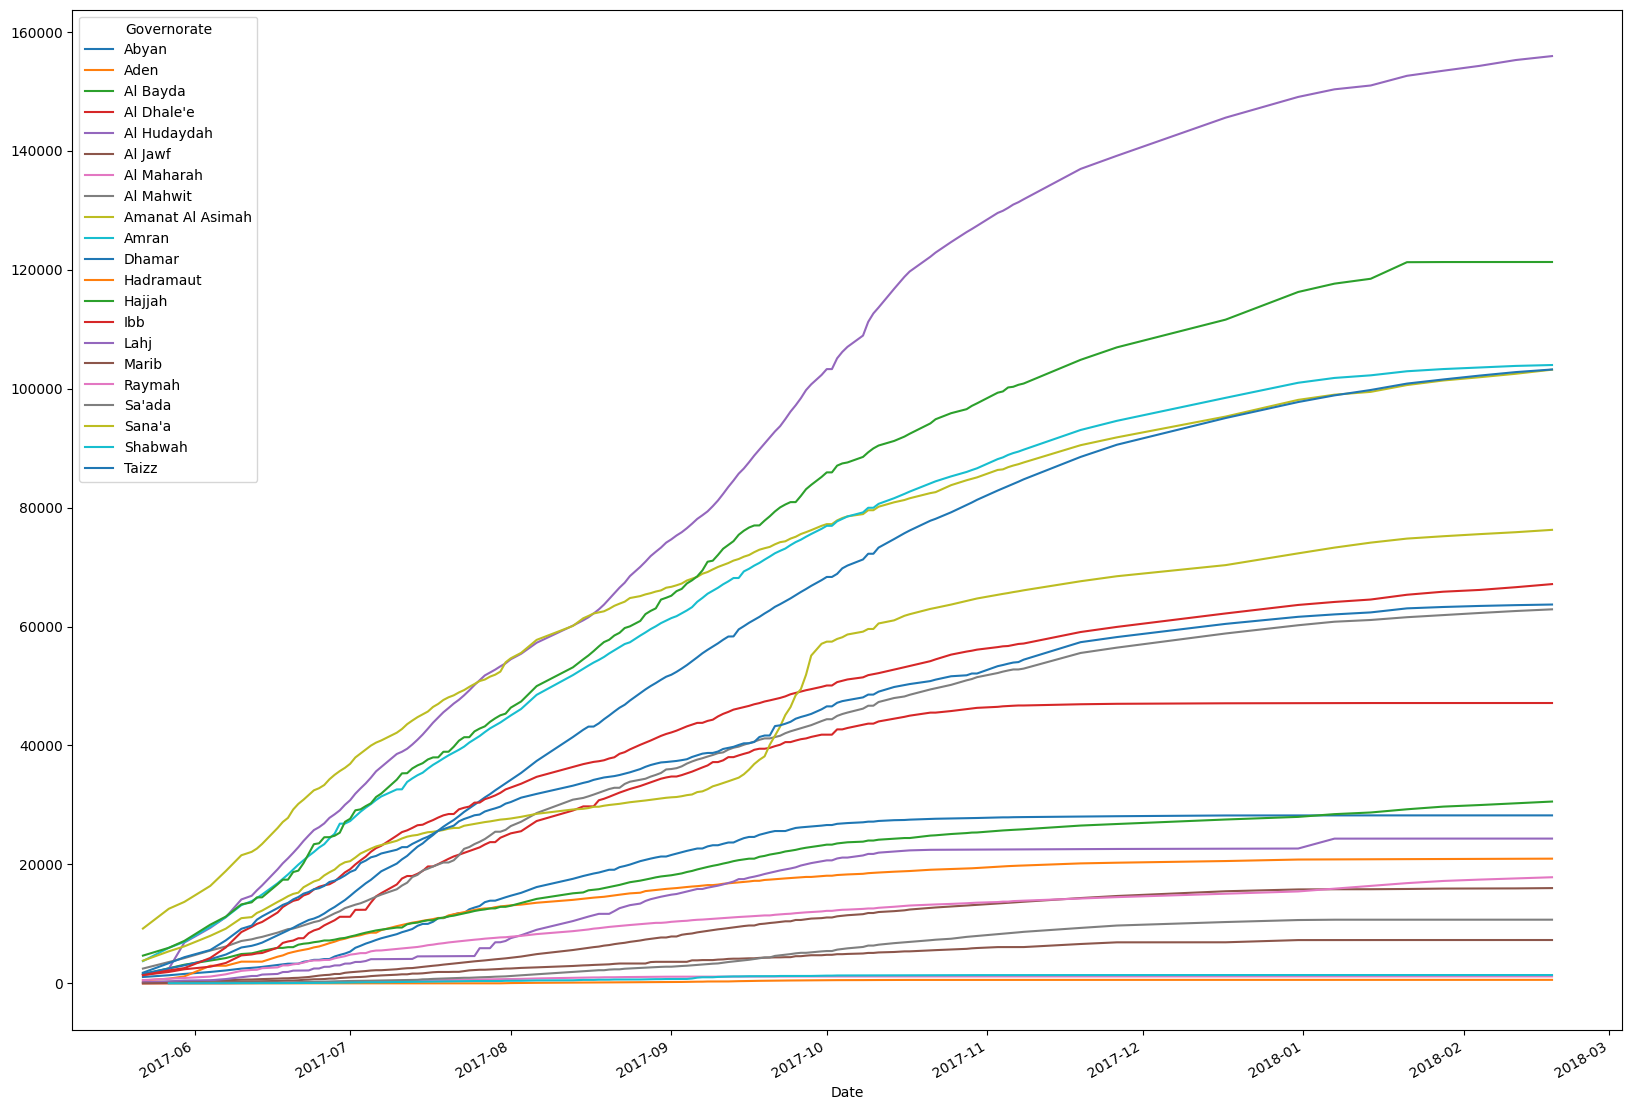

In [12]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# First we create a pivot table of the data we wish to plot. Here only the "Cases", although you
# should experiment with the other columns as well.
drawing = pd.pivot_table(data_slice, values="Cases", index=["Date"], columns=["Governorate"])
# Then we set a plot figure size and draw
drawing.plot(figsize=(20,15), grid=False)

These are not glamorous charts or tables. This last is what I call a _spaghetti chart_ because of the tangle of lines that make it difficult to track what is happening.

However, they are useful methods for investigating what the data tell us and contextualising it against the events behind the data.

Perhaps, given where we are, you feel some confidence that you could begin to piece together a story of what is happening in the Yemen cholera epidemic?

## Data and the trouble with accuracy

Sitting at your computer in comfortable surroundings - whether in a quiet office, or the clatter and warmth of your favourite coffee shop - it is tempting to place co`nfidence in a neat table of numbers and descriptions. You may have a sense that data are, in some reassuring way, _truthy_.

They are not.

All data are a reflection of the time when they were collected, the methodology that produced it, and the care with which that methodology was implemented. It is a sample of a moment in time and it is inherently imperfect.

Medical data, produced by interviewing patient volunteers, is reliant on self-reported experiences and people - even when they're trying to be honest and reporting on something uncontroversial - have imperfect memories. Blood or tissue samples depend on the consistency with which those samples were acquired, and the chain which stretches from patient, to clinic, to courier, to laboratory, to data analyst. Anything can go wrong, from spillage to spoilage to contamination to overheating or freezing.

Even data generated autonomously via sensors or computational sampling is based on what a human thought was important to measure, and implemented by people who had to interpret instructions on what to collect and apply it to the tools at hand. Sensors can be in the wrong place, pointing in the wrong direction, miscalibrated, or based on faulty assumptions from the start.

Data carry the bias of the people who constructed the research and the hopes of those who wish to learn from it.

Data are inherently uncertain and any analysis must be absolutely cognizant of this. It is the reason we start with ethics. We must, from the outset, be truthful to ourselves.

In future lessons we'll consider methods of assessing the uncertainty in our data and how much confidence we can have. For this lesson, we'll develop a theoretical understanding of the uncertainty and which data we can use to tell a story about events happening in Yemen.

In the space of six months (from May to November 2017), Yemen went from 35,000 cholera cases to almost 1 million. Deaths now exceed 2,000 people per month and the attack rate per 1,000 has gone from an average of 1, to 30. This reads like an out-of-control disaster.

At the same time, however, the fatality rate has dropped from 1% to 0.2%. 

Grounds for optimism, then? Somehow medical staff are getting on top of the illness even as infection spreads?

Consider how these data are collected. Consider the environment in which it is being collected.

<br>
<div class="well">
<b><i>Background</i></b>: reading on what is happening in Yemen (December 2017):
<br>
<ul>
    <li><a href="https://www.hrw.org/news/2017/12/07/yemen-coalition-blockade-imperils-civilians">Yemen: Coalition Blockade Imperils Civilians</a> - Human Rights Watch, 7 December 2017</li>
    <li><a href="https://www.theguardian.com/world/ng-interactive/2016/sep/16/how-saudi-arabias-airstrikes-have-hit-civilian-life-in-yemen">What is happening in Yemen and how are Saudi Arabia's airstrikes affecting civilians</a> - Paul Torpey, Pablo Gutiérrez, Glenn Swann and Cath Levett, The Guardian, 16 September 2016</li>
    <li><a href="http://www.bbc.co.uk/news/world-middle-east-39651265">Saudi 'should be blacklisted' over Yemen hospital attacks</a> - BBC, 20 April 2017</li>
    <li><a href="https://www.usip.org/sites/default/files/SR342_Process-Lessons-Learned-in-Yemens-National-Dialogue.pdf">Process Lessons Learned in Yemen’s National Dialogue</a> - Erica Gaston, USIP, February 2014</li>
</ul>
According to <a href="https://www.unicef.org/media/media_101496.html">UNICEF</a>, as of November 2017, "More than 20 million people, including over 11 million children, are in need of urgent humanitarian assistance. At least 14.8 million are without basic healthcare and an outbreak of cholera has resulted in more than 900,000 suspected cases."
</div>

Cholera incidence data are being collected in an active war zone where genocide and human rights violations committed daily. Hospital staff are stretched thin, and many have been killed. Islamic religious law requires a body to be buried as soon as possible, and this is even more important in a conflict zone to limit further spread of disease.

The likelihood is that medical staff are overwhelmed, and that the living and ill must take precedence over the dead. They see as many people as they can, and it is a testament to their dedication and professionalism that these data continue to reach the WHO and UNICEF.

There are human beings behind these data. They have suffered greatly to bring it to you.

In other words, all we can be certain of is that the Cases and Deaths are the minimum likely, and that attack- and death rates are probably extremely inaccurate. The undercount in deaths may lead to a false sense that the death rate is falling relative to infection, but one shouldn't count on this.

Despite these caveats, humanitarian organisations must use these data to prepare their relief response. Food, medication and aid workers must be readied for the moment when fighting drops sufficiently to get to Yemen. Journalists hope to stir public opinion in donor nations (and those outside nations active in the conflict), using these data to explain what is happening.

The story we are working on must accept that the infection rate is the only data that carry a reasonable approximation of what is happening, and that these data should be developed to reflect events.

## Presentation: simplicity and letting data tell a story

A data scientist requires confidence across a broad range of expertise and against a rapidly-changing environment in which the tools and methods used to pursue our profession are in continual flux. Most of what we do is safely hidden from view.

The one area where what we do rises to the awareness of the lay public is in the presentation of our results. It is also an area with continual development of new visualisation tools and techniques.

This is to highlight that the presentation part of this course may date the fastest and you should take from it principles and approaches to presentation, and not necessarily the software tools.

Presentation is everything from writing up academic findings for publication in a journal, to writing a financial and market report for a business, to producing journalism on a complex and fast-moving topic, to persuading donors and humanitarian agencies to take a particular health or environmental threat seriously.

It is, first and foremost, about organising your thoughts to tell a consistent and compelling story.

## A language and approach to data-driven story-telling

There are "lies, damned lies, and statistics", as Mark Twain used to say. Be very careful that you tell the story that is there, rather than one which reflects your own biases.

According to Edward Tufte, professor of statistics at Yale, [graphical displays should](https://www.edwardtufte.com/tufte/books_be):

 - Show the data;
 - Induce the viewer to think about the substance, rather than about the methodology, graphic design, the technology of graphic production, or something else;
 - Avoid distorting what the data have to say;
 - Present many numbers in a small space;
 - Make large datasets coherent;
 - Encourage the eye to compare different pieces of data;
 - Reveal the data at several levels of detail, from a broad overview to the fine structure;
 - Serve a reasonably clear purpose: description, exploration, tabulation, or decoration;
 - Be closely integrated with the statistical and verbal descriptions of a dataset;
 
There are a lot of people with a great many opinions about what constitutes good visual practice. Manual Lima, in his Visual Complexity blog, has even come up with an [Information Visualisation Manifesto](http://www.visualcomplexity.com/vc/blog/?p=644).

Any story has a beginning, a middle, and a conclusion. The story-telling form can vary but the best and most memorable stories have compelling narratives easily retold.

Throwing data at a bunch of charts in the hopes that something will stick does not promote engagement anymore than randomly plunking at an instrument produces music.

Storytelling does not just happen.

Sun Tzu said, "There are not more than five musical notes, yet the combinations of these five give rise to more melodies than can ever be heard."

These are the fundamental chart-types that form the data scientist's toolkit:

 - Line chart;
 - Bar chart;
 - Stacked / area variations of bar and line;
 - Bubble-charts;
 - Text charts;
 - Choropleth maps;
 - Tree maps;

Plus we can use small-multiple versions of any of the above to enhance comparisons. Small multiples are simple charts placed alongside each other in a way that encourages analysis while still telling an engaging story. The axes are the same throughout and extraneous chart guides (like dividers between the charts and the vertical axes) have been removed. The simple line-chart becomes both modern and information-dense when presented in this way.

There are numerous special types of charts (such as [Chernoff Faces](https://en.wikipedia.org/wiki/Chernoff_face)) but you're unlikely to have these implemented in your charting software.  

Here is a simple methodology for developing a visual story:

 - Write a flow-chart of the narrative encapsulating each of the components in a module;
 - Each module will encapsulate a single data-driven _thought_ and the type of chart will be imposed by the data:
   - Time-series can be presented in line charts, or by small multiples of other plots;
   - Geospatial data invites choropleths;
   - Complex multivariate data can be presented in tree maps;
 - In all matters, be led by the data and by good sense;
 - Arrange those modules in a series of illustrations;
 - Revise and edit according to the rules in the previous points;

Writing a narrative dashboard with multiple charts can be guided by George Orwell's rules from [_Politics and the English Language_](http://www.orwell.ru/library/essays/politics/english/e_polit/):

<div class="alert alert-block alert-warning">
<ol>
    <li>Never use a pie chart; use a table instead.</li>
    <li>Never use a complicated chart where a simple one will do.</li>
    <li>Never clutter your data with unnecessary grids, ticks, labels or detail.</li>
    <li>If it is possible to remove a chart without taking away from your story, always remove it.</li>
    <li>Never mislead your reader through confusing or ambiguous axes or visualisations.</li>
    <li>Break any of these rules sooner than draw anything outright barbarous.</li>
<ol>
</div>

### Telling the story of an epidemic in Yemen

We have covered a great deal in this first lesson and now we come to the final section. Before we go further, we need two new libraries. _GeoPandas_ is almost identical to Pandas, but permits us to work with geospatial data (of which, more in a moment). _Seaborn_ is similar to Matplotlib (and is a simplified wrapper around Matplotlib) but looks better, is designed for statistical data, and is simpler to use.

Our first step is to improve the line chart drawn at the end of the [initial exploration](#Initial-exploration).  I mentioned the notion of _small multiples_ earlier, and here is our first opportunity to draw it. Notice how much can be achieved in only a few lines of code, most of which (below) is about formatting the charts themselves.

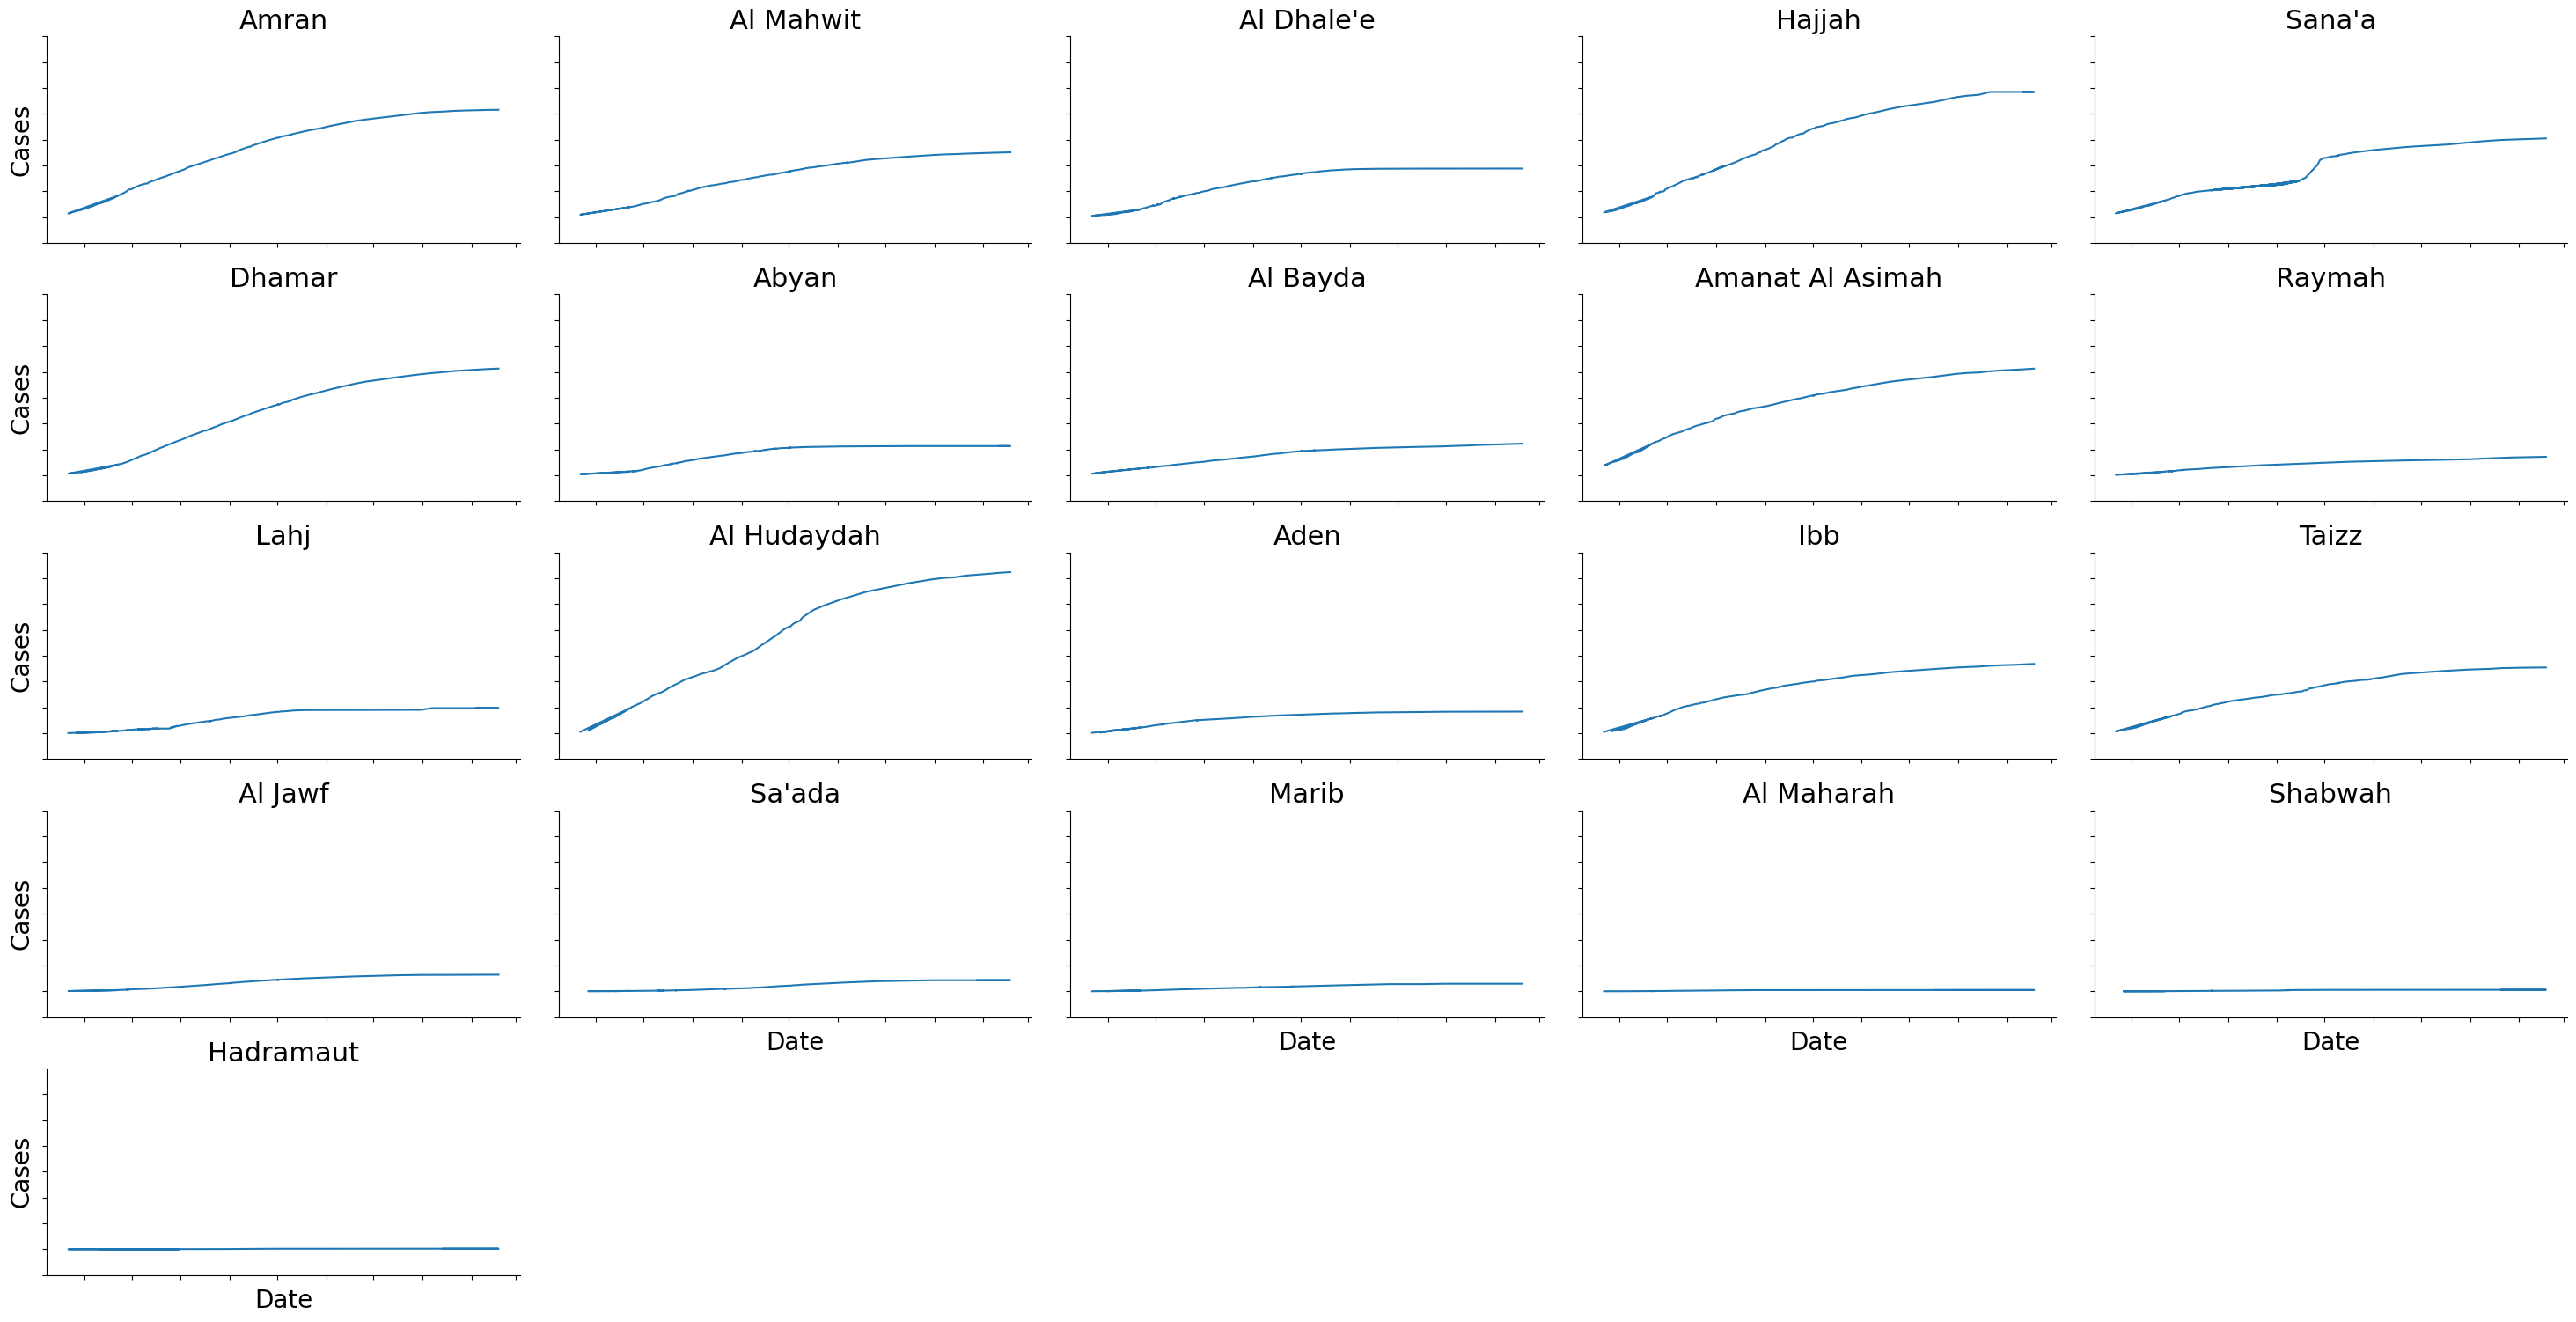

In [13]:
# Seaborn for plotting and styling
import seaborn as sns

# Everything you need to know about Seaborn FacetGrid
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid
sm = sns.FacetGrid(data_slice, col="Governorate", col_wrap=5, height=3, aspect=2, margin_titles=True)
sm = sm.map(plt.plot, "Date", "Cases")
# And now format the plots with appropriate titles and font sizes
sm.set_titles("{col_name}", size=22).set_ylabels(size=20).set_yticklabels(size=15).set_xlabels(size=20).set_xticklabels(size=12)

Notice how, even with the condensed format, it is still straightforward to understand what is happening and the overall display makes for a compelling and engaging visual.

Unfortunately, unless you know Yemen well, this story is incomplete. It is difficult to see where these changes are taking place, or how each governorate is related to the others in physical space. For that we need to plot our data onto a map.

There are a number of limits for publishing data on maps:

 - A choropleth map is really a type of bar-chart where the height of the bars is reflected by a colour gradient in 2D-space;
 - Boundaries that make up regions, districts (or governorates) are of wildly different sizes and can mislead into prioritising size over colour scale;

Despite these limitations, map-based charts are useful for grounding data in a physical place. When used in combination with other charts (such as the line-charts above) one can build a complete narrative.

To draw a map we need a [shapefile](http://wiki.openstreetmap.org/wiki/Shapefiles). These are a collection of several files developed according to a standard created by [Esri](https://www.esri.com/en-us/home) that contain information shapes defined by geographic points, polylines or polygons, as well as additional files with metadata or attributes.

HDX has exactly what we need as [_Yemen - Administrative Boundaries_](https://data.humdata.org/dataset/yemen-admin-boundaries). Download the shapefile [zip files](https://data.humdata.org/dataset/6b2656e2-b915-4671-bfed-468d5edcd80a/resource/1574d33c-c002-4294-a7c4-89433728c9b3/download/yemen_admin_20171007_shape.zip) to a folder and unzip all the files.

Now we're going to create a GeoPandas dataframe to open the shapefile, and then join this dataframe to our existing data so that we can draw maps.

In [14]:
# Import our GeoPandas library and make shapefile loading robust
import geopandas as gpd
import glob, os
# Try to find a shapefile under the data/ directory (auto-detect common names)
shp_candidates = glob.glob(os.path.join('data','*.shp')) + glob.glob(os.path.join('data','**','*.shp'), recursive=True)
shp_path = None
for p in shp_candidates:
    bn = os.path.basename(p).lower()
    if 'yem' in bn or 'yemen' in bn or 'admin' in bn or 'yem_admin' in bn:
        shp_path = p
        break
if shp_path is None and shp_candidates:
    shp_path = shp_candidates[0]  # fallback to first .shp found
if shp_path is None:
    print('No shapefile found in data/; map creation will be skipped.')
    shape_data = None
else:
    try:
        shape_data = gpd.read_file(shp_path)
        print('Loaded shapefile:', shp_path)
    except Exception as e:
        print('Failed to read shapefile', shp_path, e)
        shape_data = None
# If shapefile loaded and contains expected column, merge; otherwise skip
if shape_data is not None:
    if 'name_en' in shape_data.columns:
        # We have no data for Socotra island in the epidemic table, so drop it
        shape_data = shape_data.loc[~shape_data.name_en.isin(['Socotra'])]
        map_data = pd.merge(shape_data, data_slice, how='outer', left_on='name_en', right_on='Governorate', indicator=False)
        # Draw a map for the last date (later cells expect map_data to exist)
        fig, ax = plt.subplots(figsize=(25,14))
        md = map_data.loc[map_data.Date == '2018-01-14']
        md.plot(ax=ax, column='Cases', cmap='OrRd')
    else:
        print('Shapefile loaded but missing expected column "name_en"; skipping map creation.')
        map_data = None
else:
    map_data = None

No shapefile found in data/; map creation will be skipped.


And here we hit a fundamental limit of a map ... it would be nice to show a time-series of how events progressed.

Well, remember the small multiple ... So, to end this first lesson, here's what a small multiple map looks like.

In [15]:
# This is a bit more complex than you may expect ... but think of it like this:
# We're going to create a figure and then iterate over the time-series to progressively
# add in new subplots. Since there are 125 dates - and that's rather a lot - we'll
# deliberately limit this to the first date in each month, and the final date.

if 'map_data' not in globals() or map_data is None:
    print('map_data not available; skipping small-multiple maps')
else:
    # Ensure Date column is datetime
    map_data['Date'] = pd.to_datetime(map_data['Date'])
    # Create a datetime format data series
    dates = pd.Series(sorted(map_data['Date'].unique()))
    # Recover first date of each month (and final date)
    dl = {}
    for d in dates:
        k = "{}-{:02d}".format(d.year, d.month)
        dl[k] = d
    dates = list(dl.values())
    # Ensure final date is included
    final = pd.to_datetime(map_data['Date'].max())
    if final not in dates:
        dates.append(final)
    dates.sort()

    # Create our figure
    fig = plt.figure(figsize=(18,10))
    # Set two check_sums, first_date and sub_count
    first_date = 0
    sub_count = 1
    # Loop through the dates, using "enumerate" to count the number of times we loop
    for i, d in enumerate(dates[:9]):
        # Get a dataframe for the subplot at this date
        subplot = map_data.loc[map_data.Date == d]
        # Add the appropriate subplot in a frame structured as 3 items in 3 rows
        ax = fig.add_subplot(3, 3, sub_count)
        sub_count += 1
        # Do some visual fixes to ensure we don't distort the maps, and provide titles
        ax.set_aspect('equal')
        ax.set_axis_off()
        ax.title.set_text(d.date())
        # And plot (guard empty subplot)
        if len(subplot):
            subplot.plot(ax=ax, column='Cases', cmap='OrRd')
        else:
            ax.text(0.5, 0.5, 'No data', horizontalalignment='center', transform=ax.transAxes)
    plt.tight_layout()


map_data not available; skipping small-multiple maps


In [16]:
# Let's save our data_slice and map_slice for later use:
data_slice.to_csv("data/yemen_cholera_data_slice.csv", index=False)
# map_data may not be defined if geopandas failed earlier. Save defensively:
if 'map_data' in globals() or 'map_data' in locals():
    try:
        map_data.to_csv("data/yemen_cholera_map_slice.csv", index=False)
    except Exception as e:
        print('Failed saving map_data:', e)
        # fallback: save aggregated governorate-level summary instead
        fallback = data_slice.groupby('Governorate').agg({'Cases':'sum','Deaths':'sum'}).reset_index()
        fallback.to_csv("data/yemen_cholera_map_slice.csv", index=False)
        print('Saved aggregated fallback as data/yemen_cholera_map_slice.csv')
else:
    # Create and save a simple aggregated fallback so downstream steps have a map-slice file
    fallback = data_slice.groupby('Governorate').agg({'Cases':'sum','Deaths':'sum'}).reset_index()
    fallback.to_csv("data/yemen_cholera_map_slice.csv", index=False)
    print('map_data not defined; saved aggregated fallback as data/yemen_cholera_map_slice.csv')

OSError: Cannot save file into a non-existent directory: 'data'

That brings us to the end of this lesson and this case-study. You can play around with the code, pick a different column to visualise (perhaps "Deaths"), and can learn more in the libraries about how to present these charts.

In [ ]:
# ...existing code...
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas
from datetime import datetime

# Create outputs folder
outdir = "outputs"
os.makedirs(outdir, exist_ok=True)

# Load data (uses CSVs produced earlier in the notebook)
# Use a relative path to the CSV in the workspace so the notebook runs on Windows
ds_path = "yemen-cholera-outbreak.csv"
map_shp = "data/yem_admin1.shp"  # shapefile expected by the notebook

data_slice = pd.read_csv(ds_path, parse_dates=["Date"])
# Ensure numeric columns are numeric (remove commas and coerce) so aggregations work
if "Cases" in data_slice.columns:
    data_slice["Cases"] = pd.to_numeric(data_slice["Cases"].astype(str).str.replace(",", ""), errors='coerce').fillna(0).astype(int)
if "Deaths" in data_slice.columns:
    data_slice["Deaths"] = pd.to_numeric(data_slice["Deaths"].astype(str).str.replace(",", ""), errors='coerce').fillna(0).astype(int)
for col in ["CFR (%)", "Attack Rate (per 1000)"]:
    if col in data_slice.columns:
        data_slice[col] = pd.to_numeric(data_slice[col].astype(str).str.replace(",", ""), errors='coerce').fillna(0.0).astype(float)
# 1) Aggregate time series (total daily cases)
ts = data_slice.groupby("Date")["Cases"].sum().sort_index()
plt.figure(figsize=(14,6))
plt.plot(ts.index, ts.values, color="tab:orange")
plt.title("Yemen — Daily suspected cholera cases (all governorates)")
plt.xlabel("Date")
plt.ylabel("Cases (daily)")
plt.grid(alpha=0.2)
png1 = os.path.join(outdir, "agg_timeseries.png")
plt.tight_layout()
plt.savefig(png1, dpi=150)
plt.close()

# 2) Small-multiples: one chart per governorate (condensed)
# limit to top 25 governorates by cumulative cases for legibility
gov_totals = data_slice.groupby("Governorate")["Cases"].sum().sort_values(ascending=False)
top_govs = gov_totals.head(25).index.tolist()
sm = data_slice[data_slice["Governorate"].isin(top_govs)]
g = sns.FacetGrid(sm, col="Governorate", col_wrap=5, height=2.2, aspect=1.6)
g.map_dataframe(sns.lineplot, x="Date", y="Cases", color="tab:blue")
g.set_titles("{col_name}", size=10)
g.set_axis_labels("", "Cases")
for ax in g.axes.flatten():
    ax.tick_params(axis='x', labelrotation=30, labelsize=7)
png2 = os.path.join(outdir, "small_multiples_top25.png")
plt.tight_layout()
plt.savefig(png2, dpi=150)
plt.close()

# 3) Choropleth for last date (if shapefile available), otherwise top gov bar chart
try:
    import geopandas as gpd
    shape = gpd.read_file(map_shp)
    # merge with last date data
    last_date = data_slice["Date"].max()
    md = data_slice.loc[data_slice["Date"] == last_date]
    # shapefile column used in notebook: name_en
    shape = shape.loc[~shape["name_en"].isin(["Socotra"])]
    map_data = shape.merge(md, how="left", left_on="name_en", right_on="Governorate")
    fig, ax = plt.subplots(1,1, figsize=(12,8))
    map_data.plot(column="Cases", cmap="OrRd", legend=True, ax=ax, missing_kwds={"color":"lightgrey"})
    ax.set_title(f"Cholera cases by governorate — {last_date.date()}")
    ax.axis('off')
    png3 = os.path.join(outdir, "choropleth_lastdate.png")
    plt.savefig(png3, dpi=150, bbox_inches="tight")
    plt.close()
except Exception as e:
    # fallback: bar chart of top 10 governorates on last date
    last_date = data_slice["Date"].max()
    md = data_slice.loc[data_slice["Date"] == last_date]
    top10 = md.sort_values("Cases", ascending=False).head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(data=top10, x="Cases", y="Governorate", palette="OrRd")
    plt.title(f"Top 10 governorates — cases on {last_date.date()}")
    png3 = os.path.join(outdir, "top10_lastdate.png")
    plt.tight_layout()
    plt.savefig(png3, dpi=150)
    plt.close()

C:\Users\blasi\AppData\Local\Temp\ipykernel_41796\1983883797.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x="Cases", y="Governorate", palette="OrRd")


Outputs written to: outputs
Files: ['agg_timeseries.png', 'small_multiples_top25.png', 'top10_lastdate.png', 'Yemen_Cholera_Brief.pdf']


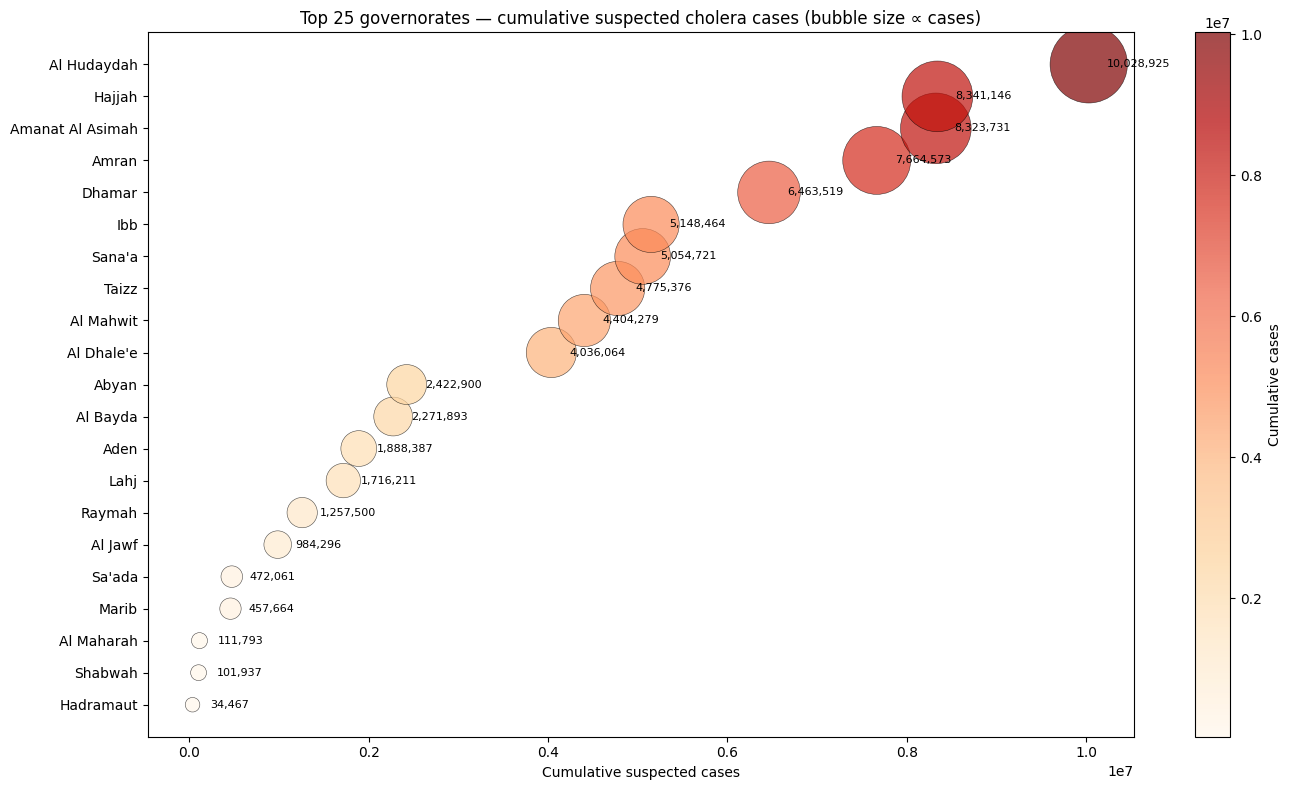

In [19]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Guard: require data_slice
if 'data_slice' not in globals() and 'data_slice' not in locals():
  print("data_slice not defined — run earlier cells that prepare data_slice.")
else:
  outdir = "outputs"
  os.makedirs(outdir, exist_ok=True)

  # Aggregate cumulative cases by governorate and keep top N for readability
  top_n = 25
  gov_totals = data_slice.groupby("Governorate")["Cases"].sum().sort_values(ascending=True).reset_index()  # Changed to ascending=True
  gov = gov_totals.tail(top_n)  # Changed to tail() to get highest values

  y = list(range(len(gov)))
  x = gov["Cases"].values
  # Scale sizes so bubbles are visible (adjust multiplier as needed)
  sizes = (x / x.max()) * 3000 + 100

  plt.figure(figsize=(14,8))
  sc = plt.scatter(x, y, s=sizes, c=x, cmap="OrRd", alpha=0.7, edgecolors="k", linewidth=0.4)
  plt.colorbar(sc, label="Cumulative cases")
  plt.yticks(y, gov["Governorate"])
  plt.xlabel("Cumulative suspected cases")
  plt.title(f"Top {top_n} governorates — cumulative suspected cholera cases (bubble size ∝ cases)")

  # Annotate numeric values to the right of the bubbles
  for i, val in enumerate(x):
    plt.text(val + max(x)*0.02, i, f"{int(val):,}", ha="left", va="center", fontsize=8)

  plt.tight_layout()
  png = os.path.join(outdir, f"bubble_top{top_n}_cumulative_cases.png")
  plt.savefig(png, dpi=150, bbox_inches="tight")
  plt.show()
  plt.close()